# B. Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to.

Dataset Link:https://www.kaggle.com/datasets/uciml/iris

**Theory**:

**Linear Discriminant Analysis (LDA)** is a statistical method used in machine learning for classification and dimensionality reduction. It's a supervised learning technique, meaning it requires labeled data to learn the decision boundaries between different classes.

**How LDA Works:**

1. **Dimensionality Reduction:** LDA aims to find a linear combination of features that best separates different classes. It projects the data onto a lower-dimensional space while maximizing the separation between classes and minimizing the variance within each class.
2. **Classification:** Once the data is projected onto this lower-dimensional space, LDA uses Bayes' theorem to classify new data points. It assumes that the data in each class follows a Gaussian distribution.

**Key Points:**

* **Supervised Learning:** LDA requires labeled data.
* **Dimensionality Reduction:** It can reduce the dimensionality of data while preserving the information relevant for classification.
* **Classification:** It can be used directly as a classifier.
* **Assumption of Gaussian Distribution:** LDA assumes that the data within each class follows a Gaussian distribution.

**Applications of LDA:**

* **Face Recognition:** LDA can be used to reduce the dimensionality of facial images while preserving the information that distinguishes different faces.
* **Document Classification:** It can be used to classify documents into different categories based on their content.
* **Medical Diagnosis:** LDA can be used to classify patients into different disease categories based on their medical records.

**Advantages of LDA:**

* **Simple and Efficient:** LDA is a relatively simple algorithm and can be computationally efficient.
* **Effective for High-Dimensional Data:** It can handle high-dimensional data effectively.
* **Good Performance:** LDA often performs well, especially when the assumption of Gaussian distribution holds.

**Disadvantages of LDA:**

* **Assumption of Gaussian Distribution:** If the data does not follow a Gaussian distribution, LDA's performance may suffer.
* **Sensitivity to Outliers:** LDA can be sensitive to outliers, which can affect the accuracy of the model.

Overall, LDA is a powerful tool for classification and dimensionality reduction. It's a good choice when you have a relatively small dataset and the assumption of Gaussian distribution is reasonable.


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as RS
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.drop(columns='Id', inplace=True)

In [ ]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,6.3,3.4,5.6,2.4,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
X=iris.iloc[:,:-1] #Features : sepal length, sepal width, petal length, petal width
y=iris.iloc[:,-1]  #Target : Species (0 - Setosa, 1- versicolor , 2- virginica)

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


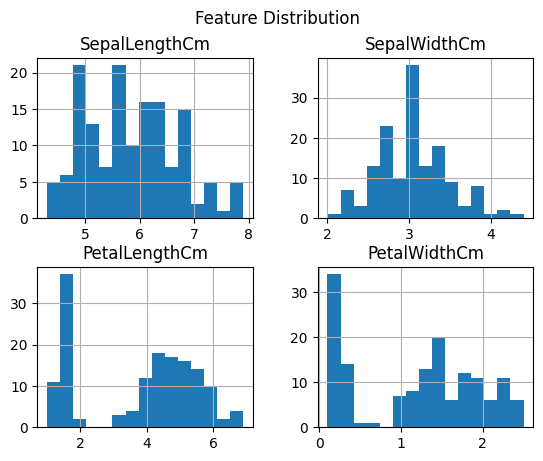

In [ ]:
#checking distribution of data

X.hist(bins=15, layout=(2,2))
plt.suptitle("Feature Distribution")
plt.show()

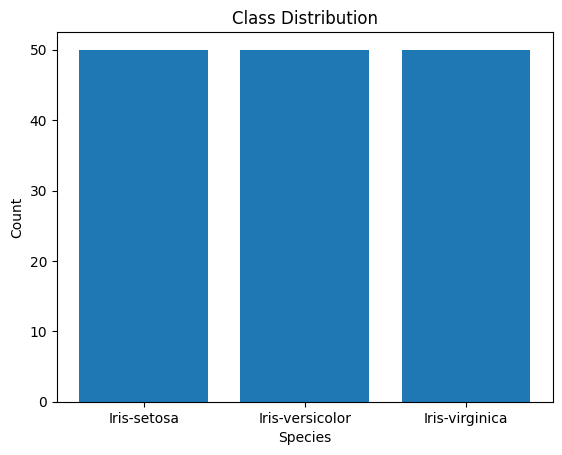

In [ ]:
plt.bar(y.unique(), y.value_counts())
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [ ]:
#Creating train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**random state = 42**
- Seed for reproducibility for random splitting of data between training and testing
- 42 is any random number

In [ ]:
#scaling
scaler = RS()

In [ ]:
#scale x train and x test
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
#Perform LDA
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names = y.unique())

**Accuracy = (Number of correct predictions) / (Total number of predictions)**

**Accuracy = (TP + TN) / (TP + TN + FP + FN)**

**Precision:** Measures the proportion of positive predictions that are actually correct.

**Precision = TP / (TP + FP)**

**Recall:** Measures the proportion of actual positive cases that are correctly identified.

**Recall = TP / (TP + FN)** as *FN* should be positive

**F1-score:** Combines precision and recall into a single metric.

**F1-Score = 2 * (Precision * Recall) / (Precision + Recall)**

**Confusion Matrix:** Provides a detailed breakdown of correct and incorrect predictions.
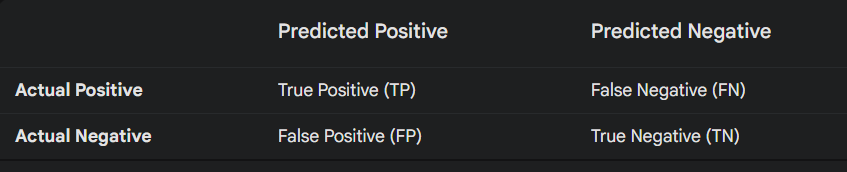

In [ ]:
print(f"accuracy score : {accuracy} \n")
print(f"confusion matrix : \n{matrix} \n")
print(f"classification report : \n{report} \n")

accuracy score : 0.9777777777777777 

confusion matrix : 
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]] 

classification report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45
 



**Classification report**

*Support:*
Number of samples of the true response that lie in that class.

*Macro avg* : These metrics are calculated by averaging the corresponding metric for each class.

*weighted avg* : These metrics are calculated by averaging the corresponding metric for each class, weighted by the number of samples in that class.

In [ ]:
#classify a sample with specific feature values
#                    s-len,s-wid,p-len,p-wid
sample = pd.DataFrame([[4.7	,3.2,	1.3,	0.2]], columns=X.columns)
predicted_species = lda.predict(sample)
print(f"Predicted Species : {predicted_species[0]}")

Predicted Species : Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [ ]:
matching_rows = iris[(iris['SepalLengthCm'] == 5.7) &
                     (iris['SepalWidthCm'] == 2.8) &
                     (iris['PetalLengthCm'] == 4.5) &
                     (iris['PetalWidthCm'] == 1.3)]

if not matching_rows.empty:
    print("Found matching rows:")
    print(matching_rows)
else:
    print("No exact matches found.")

Found matching rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
55            5.7           2.8            4.5           1.3  Iris-versicolor


In [ ]:
iris.loc[iris['Species'] == 'Iris-setosa']

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
